<a href="https://colab.research.google.com/github/suganthialagumalai/suganthialagumalai/blob/main/chennaihouseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CHENNAI HOUSE SALES PRICES

In [1534]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import plotly.express as px

import datetime

In [1535]:
df=pd.read_csv("/content/train-chennai-sale.csv")

In [1536]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


# Data Cleaning

# For Null Values

In [1537]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

# For DataTypes

In [1538]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# Filling the null values ---Discrete values with MODE,and Continuous values with MEDIAN


In [1539]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace=True)

In [1540]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace=True)

In [1541]:
df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean(),inplace=True)

# Conversion of DataTypes

In [1542]:
df.N_BEDROOM = df.N_BEDROOM.astype('int64')
dfN_BATHROOM = df.N_BATHROOM.astype('int64')
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])
df['DATE_BUILD']


0      1967-05-15
1      1995-12-22
2      1992-09-02
3      1988-03-18
4      1979-10-13
          ...    
7104   1962-01-15
7105   1995-11-04
7106   1978-01-09
7107   1977-11-08
7108   1961-07-24
Name: DATE_BUILD, Length: 7109, dtype: datetime64[ns]

**##OUTLIERS DETECTION USING Z-SCORE This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean.
**Z score = (x -mean) / std. deviation**  and BOX POLT**


In [1543]:
sum(((df.INT_SQFT - df.INT_SQFT.mean())/df.INT_SQFT.std()) >3) 

0

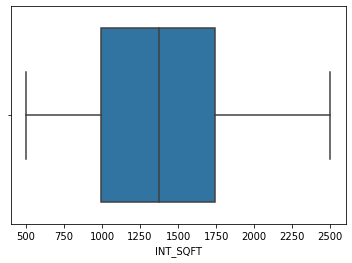

In [1544]:
a = sns.boxplot(x=df["INT_SQFT"])

In [1545]:
df['INT_SQFT']

0       1004
1       1986
2        909
3       1855
4       1226
        ... 
7104     598
7105    1897
7106    1614
7107     787
7108    1896
Name: INT_SQFT, Length: 7109, dtype: int64

In [1546]:
sum(((df.DIST_MAINROAD - df.DIST_MAINROAD.mean())/df.DIST_MAINROAD.std()) >3 )

0

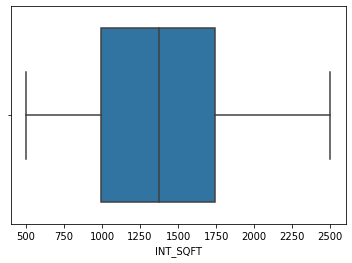

In [1547]:
b=sns.boxplot(x=df["INT_SQFT"])

In [1548]:
sum(((df.N_BEDROOM - df.N_BEDROOM.mean())/df.N_BEDROOM.std()) >3 )

0

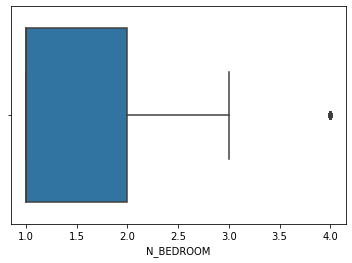

In [1549]:
c=sns.boxplot(x=df["N_BEDROOM"])

In [1550]:
sum(((df.N_BATHROOM - df.N_BATHROOM.mean())/df.N_BATHROOM.std()) >3 )

0

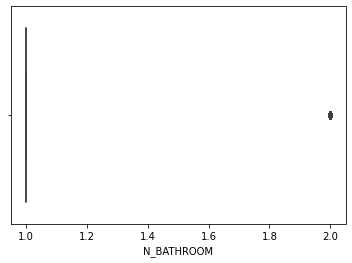

In [1551]:
d=sns.boxplot(x=df["N_BATHROOM"])

In [1552]:

sum(((df.N_ROOM - df.N_ROOM.mean())/df.N_ROOM.std()) >3 )

0

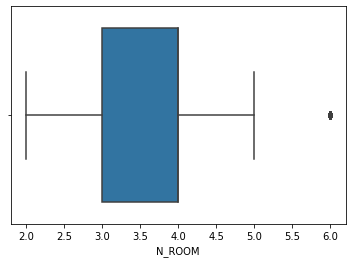

In [1553]:
e = sns.boxplot(x=df["N_ROOM"])

In [1554]:
sum(((df.SALES_PRICE - df.SALES_PRICE.mean())/df.SALES_PRICE.std())>3)

37

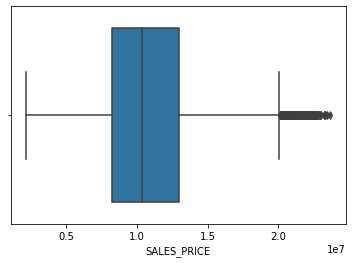

In [1555]:
ax = sns.boxplot(x=df["SALES_PRICE"])

# As sales price Depends on several factors dont need to correct the outliers

# Spelling Mistakes Correction

In [1556]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012-04-02,70,1,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,2010-03-13,14,3,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,2009-05-10,84,1,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011-03-01,51,1,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,2004-08-04,52,3,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,2006-08-25,152,2,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,2009-03-08,40,1,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


## **Spelling Check**

# For Area Column- Finding unique values and replacing them

In [1557]:
df.AREA.unique()


array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [1558]:
df['AREA']=df['AREA'].replace({"Karapakam":"Karapakkam","Ann Nagar":"Anna Nagar","Ana Nagar":"Anna Nagar",
                               "Adyr":"Adyar","Velchery":"Velachery", "Chrompt":"Chrompet","Chrmpet":"Chrompet", 
                               "Chormpet":"Chrompet","KK Nagar":"KKNagar","T Nagar":"TNagar"})

# After Replacing 

In [1559]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KKNagar', 'TNagar'], dtype=object)

# For Column SALE_COND

In [1560]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [1561]:
df['SALE_COND']=df['SALE_COND'].replace({'Ab Normal':'AbNormal','Adj Land':'AdjLand','Ab Normal':'AbNormal',
                                         'Partiall':'Partial','PartiaLl':'Partial'})

#After replacing Column SALE_COND

In [1562]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

# For Column BUILDTYPE

In [1563]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [1564]:
df.BUILDTYPE = df.BUILDTYPE.replace({"Other":"Others","Comercial":"Commercial","houses":"House","Houses":"House"})

In [1565]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)



## For column UTILITY_AVAIL


In [1566]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [1567]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.replace({"All Pub":"AllPub",'NoSewr ':'NoSeWa'})

In [1568]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSeWa'], dtype=object)

## For column PARK_FACIL

In [1569]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [1570]:
df.PARK_FACIL= df.PARK_FACIL.replace({"yes":"Yes","Noo":"No"})

In [1571]:
df.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

## For column STREET 

In [1572]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [1573]:
df.STREET=df.STREET.replace({"NoAccess" : "No Access",'Pavd':'Paved'})

In [1574]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

##  For Column MZZONE

In [1575]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [1576]:
##NO NEED to spelling in MZZONE column. Column value that have more than 2 characters has to be checked for spelling

In [1577]:
df['AGE']=df["DATE_SALE"].dt.year-df["DATE_BUILD"].dt.year

In [1578]:
df["AGE"]

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE, Length: 7109, dtype: int64

In [1579]:
df["TOTAL_HOUSE_PRICE"]=df["REG_FEE"]+df["COMMIS"]+df["SALES_PRICE"]

In [1580]:
df["TOTAL_HOUSE_PRICE"]

0        8124400
1       22781941
2       13672408
3       10063653
4        7717313
          ...   
7104     5668827
7105    11370222
7106     8835792
7107     9051448
7108    10405469
Name: TOTAL_HOUSE_PRICE, Length: 7109, dtype: int64

**Exploratory Data Analysis**

### Distribution Plots

## distribution plots in seaborn which is used for examining univariate and bivariate distributions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



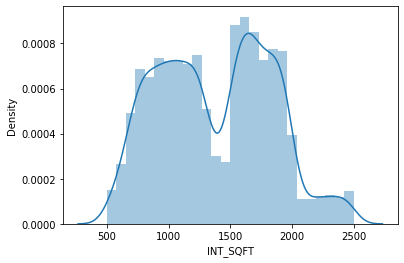

In [1581]:

sns.distplot(df.INT_SQFT)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



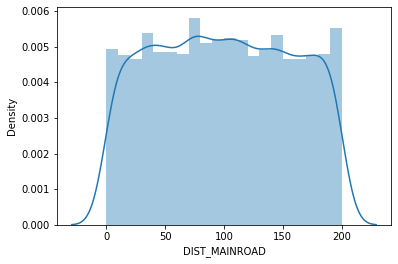

In [1582]:
sns.distplot(df.DIST_MAINROAD)

## A countplot is a plot between a categorical and a continuous variable. The continuous variable in this case being the number of times the categorical is present or simply the frequency. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



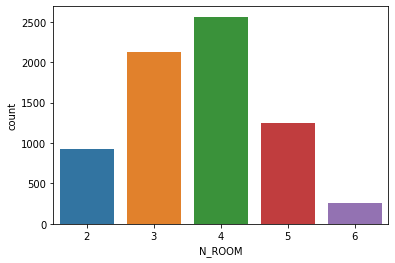

In [1583]:
sns.countplot(df['N_ROOM'])



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



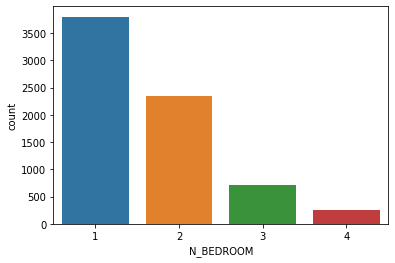

In [1584]:
sns.countplot(df['N_BEDROOM'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



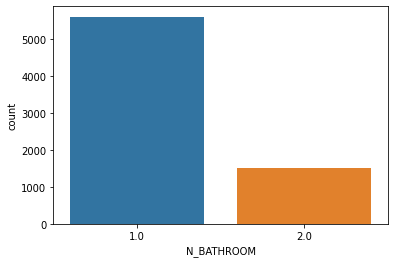

In [1585]:
sns.countplot(df['N_BATHROOM'])

## Pie chart is a univariate analysis and are typically used to show percentage or proportional data. The percentage distribution of each class in a variable is provided next to the corresponding slice of the pie. 

In [1586]:
value = df['SALE_COND'].value_counts()
name = df['SALE_COND'].unique()

fig1 = px.pie(df,values = value, names=name, color = value,title="SALE_COND")
fig1

In [1587]:
df["PARK_FACIL"] = df['PARK_FACIL'].map({'Yes':1,'No':0})
df.PARK_FACIL= df.PARK_FACIL.astype('int64')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



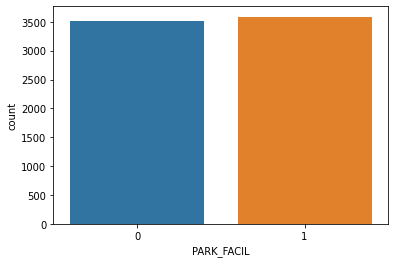

In [1588]:
sns.countplot(df['PARK_FACIL'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



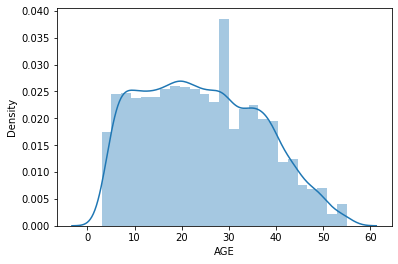

In [1589]:
sns.distplot(df.AGE)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



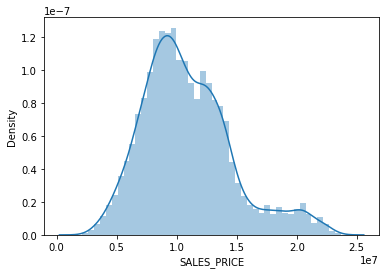

In [1590]:
sns.distplot(df.SALES_PRICE)

##  Feature vs Target

###AREA VS TOTAL HOUSE PRICE

In [1591]:
x = pd.DataFrame(df.groupby('AREA')["TOTAL_HOUSE_PRICE"].mean())
print(x)
y = df['AREA'].unique()
y = sorted(y)
print(y)
df2 = {'AREA':y,"AVERAGE_PRICE":x['TOTAL_HOUSE_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'AREA',y = 'AVERAGE_PRICE', color = 'AREA', title = "AREA VS AVERAGE_PRICE")
fig1

            TOTAL_HOUSE_PRICE
AREA                         
Adyar            9.580581e+06
Anna Nagar       1.584423e+07
Chrompet         1.040800e+07
KKNagar          1.341933e+07
Karapakkam       7.755477e+06
TNagar           1.632265e+07
Velachery        1.158841e+07
['Adyar', 'Anna Nagar', 'Chrompet', 'KKNagar', 'Karapakkam', 'TNagar', 'Velachery']


###     INT_SQFT VS TOTAL HOUSE PRICE

In [1592]:
fig1 = px.scatter(df,x = 'INT_SQFT', y = 'TOTAL_HOUSE_PRICE', color = 'INT_SQFT' ,title="INT_SQFT VS TOTAL_SALES_PRICE")
fig1

###  DIST_MAINROAD VS TOTAL HOUSE PRICE

In [1593]:
fig2 = px.scatter(df,x = 'DIST_MAINROAD', y = 'TOTAL_HOUSE_PRICE', color = 'DIST_MAINROAD',title="DIST_MAINROAD VS TOTAL_SALES_PRICE")
fig2

###   N_ROOM VS TOTAL HOUSE PRICE

In [1594]:
x = pd.DataFrame(df.groupby('N_ROOM')["TOTAL_HOUSE_PRICE"].mean())
y = df['N_ROOM'].unique()
y = sorted(y)
df2 = {'N_ROOM':y,"AVERAGE_PRICE":x['TOTAL_HOUSE_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'N_ROOM',y = 'AVERAGE_PRICE', color = 'N_ROOM', title = "N_ROOM VS AVERAGE_PRICE")
fig1

###   N_BEDROOM VS TOTAL HOUSE PRICE

In [1595]:
x=pd.DataFrame(df.groupby('N_BEDROOM')["TOTAL_HOUSE_PRICE"].mean())
y=df['N_BEDROOM'].unique()
y=sorted(y)
df2={'N_BEDROOM':y,"AVERAGE_PRICE":x["TOTAL_HOUSE_PRICE"]}
temp=pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace=True)

fig1 = px.bar(temp,x = 'N_BEDROOM',y = 'AVERAGE_PRICE', color = 'N_BEDROOM', title = "N_BEDROOM VS AVERAGE_PRICE")
fig1


###   N_BATHROOM VS TOTAL HOUSE PRICE

In [1596]:
x=pd.DataFrame(df.groupby('N_BATHROOM')['TOTAL_HOUSE_PRICE'].mean())
y=df['N_BATHROOM'].unique()
y=sorted(y)
df1={'N_BATHROOM':y,'AVERAGE_PRICE':x["TOTAL_HOUSE_PRICE"]}
temp=pd.DataFrame(df1)
temp.sort_values('AVERAGE_PRICE',inplace=True)



In [1597]:
fig=px.bar(temp,x='N_BATHROOM',y='AVERAGE_PRICE',color='N_BATHROOM',title='N_BATHROOM VS AVERAGE PRICE')
fig

###  SALE_COND VS TOTAL HOUSE PRICE

In [1598]:
x=pd.DataFrame(df.groupby('SALE_COND')['TOTAL_HOUSE_PRICE'].mean())
y=df['SALE_COND'].unique()
y=sorted(y)
df1={'SALE_COND':y,'AVERAGE_PRICE':x['TOTAL_HOUSE_PRICE']}
temp=pd.DataFrame(df1)
temp.sort_values('AVERAGE_PRICE',inplace=True)

fig=px.bar(temp,x='SALE_COND',y='AVERAGE_PRICE',color='SALE_COND',title='SALE_COND VS AVERAGE PRICE')
fig

## BUILDTYPE VS AVERAGE PRICE

In [1599]:
x = pd.DataFrame(df.groupby('BUILDTYPE')["TOTAL_HOUSE_PRICE"].mean())
y = df['BUILDTYPE'].unique()
y = sorted(y)
df2 = {'BUILDTYPE':y,"AVERAGE_PRICE":x['TOTAL_HOUSE_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'BUILDTYPE',y = 'AVERAGE_PRICE', color = 'BUILDTYPE', title = "BUILDTYPE VS AVERAGE_PRICE")
fig1

#UTILITY_AVAIL VS AVERAGE PRICE

In [1600]:
x = pd.DataFrame(df.groupby('UTILITY_AVAIL')["TOTAL_HOUSE_PRICE"].mean())
y = df['UTILITY_AVAIL'].unique()
y = sorted(y)
df2 = {'UTILITY_AVAIL':y,"AVERAGE_PRICE":x['TOTAL_HOUSE_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'UTILITY_AVAIL',y = 'AVERAGE_PRICE', color = 'UTILITY_AVAIL', title = "UTILITY_AVAIL VS AVERAGE_PRICE")
fig1

#STREET VS AVERAGE PRICE

In [1601]:
x = pd.DataFrame(df.groupby('STREET')["TOTAL_HOUSE_PRICE"].mean())
y = df['STREET'].unique()
y = sorted(y)
df2 = {'STREET':y,"AVERAGE_PRICE":x['TOTAL_HOUSE_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'STREET',y = 'AVERAGE_PRICE', color = 'STREET', title = "STREET VS AVERAGE_PRICE")
fig1

## MZZONE VS AVERAGE_PRICE

In [1602]:
x = pd.DataFrame(df.groupby('MZZONE')["TOTAL_HOUSE_PRICE"].mean())
y = df['MZZONE'].unique()
y = sorted(y)
df2 = {'MZZONE':y,"AVERAGE_PRICE":x['TOTAL_HOUSE_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'MZZONE',y = 'AVERAGE_PRICE', color = 'MZZONE', title = "MZZONE VS AVERAGE_PRICE")
fig1

## AGE_OF_HOUSE VS AVERAGE_PRICE

In [1603]:
x = pd.DataFrame(df.groupby('AGE')["TOTAL_HOUSE_PRICE"].mean())
y = df['AGE'].unique()
y = sorted(y)
df2 = {'AGE':y,"AVERAGE_PRICE":x['TOTAL_HOUSE_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'AGE',y = 'AVERAGE_PRICE', color = 'AGE', title = "AGE_OF_BUILDING VS AVERAGE_PRICE")
fig1

In [1604]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE,TOTAL_HOUSE_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,0.504572,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07,24.276270,1.141285e+07
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.500014,0.891972,0.897834,0.887266,0.525440,143070.662010,78768.093718,3.768603e+06,12.334164,3.944957e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.000000,2.253935e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,0.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06,14.000000,8.645792e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,1.000000,3.500000,3.500000,3.500000,3.503254,349486.000000,127628.000000,1.033505e+07,23.000000,1.081953e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,1.000000,4.300000,4.300000,4.300000,3.880000,451562.000000,184506.000000,1.299390e+07,34.000000,1.361393e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,1.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,55.000000,2.496904e+07


In [1605]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE,TOTAL_HOUSE_PRICE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1.0,3,AbNormal,1,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44,8124400
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1.0,5,AbNormal,0,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11,22781941
2,P01812,Adyar,909,2012-04-02,70,1,1.0,3,AbNormal,1,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20,13672408
3,P05346,Velachery,1855,2010-03-13,14,3,2.0,5,Family,0,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22,10063653
4,P06210,Karapakkam,1226,2009-05-10,84,1,1.0,3,AbNormal,1,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30,7717313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011-03-01,51,1,1.0,2,AdjLand,0,...,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,49,5668827
7105,P10000,Velachery,1897,2004-08-04,52,3,2.0,5,Family,1,...,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,9,11370222
7106,P09594,Velachery,1614,2006-08-25,152,2,1.0,4,Normal Sale,0,...,I,4.3,4.2,2.9,3.840,317354,167028,8351410,28,8835792
7107,P06508,Karapakkam,787,2009-03-08,40,1,1.0,2,Partial,1,...,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,32,9051448


In [1606]:
df['AREA']

0       Karapakkam
1       Anna Nagar
2            Adyar
3        Velachery
4       Karapakkam
           ...    
7104    Karapakkam
7105     Velachery
7106     Velachery
7107    Karapakkam
7108     Velachery
Name: AREA, Length: 7109, dtype: object

In [1607]:
area = {'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velachery':3, 'KKNagar':4,'Anna Nagar':5, 'TNagar':6}
df['AREA'] = df.AREA.map(area)



In [1608]:
df['AREA']

0       0
1       5
2       1
3       3
4       0
       ..
7104    0
7105    3
7106    3
7107    0
7108    3
Name: AREA, Length: 7109, dtype: int64

In [1609]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE,TOTAL_HOUSE_PRICE
0,P03210,0,1004,2011-04-05,131,1,1.0,3,AbNormal,1,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44,8124400
1,P09411,5,1986,2006-12-19,26,2,1.0,5,AbNormal,0,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11,22781941
2,P01812,1,909,2012-04-02,70,1,1.0,3,AbNormal,1,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20,13672408
3,P05346,3,1855,2010-03-13,14,3,2.0,5,Family,0,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22,10063653
4,P06210,0,1226,2009-05-10,84,1,1.0,3,AbNormal,1,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30,7717313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,0,598,2011-03-01,51,1,1.0,2,AdjLand,0,...,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,49,5668827
7105,P10000,3,1897,2004-08-04,52,3,2.0,5,Family,1,...,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,9,11370222
7106,P09594,3,1614,2006-08-25,152,2,1.0,4,Normal Sale,0,...,I,4.3,4.2,2.9,3.840,317354,167028,8351410,28,8835792
7107,P06508,0,787,2009-03-08,40,1,1.0,2,Partial,1,...,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,32,9051448


In [1610]:
df['AREA'].unique()

array([0, 5, 1, 3, 2, 4, 6])

In [1611]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [1612]:
sale_cond = {'Partial':0, 'Family':1, 'AbNormal':2,'Normal Sale':3, 'AdjLand':4}
df['SALE_COND'] = df.SALE_COND.map(sale_cond)

In [1613]:
df['SALE_COND']

0       2
1       2
2       2
3       1
4       2
       ..
7104    4
7105    1
7106    3
7107    0
7108    0
Name: SALE_COND, Length: 7109, dtype: int64

In [1614]:
buildtype = {'House':0, 'Others':1, 'Commercial':2}
df['BUILDTYPE'] = df.BUILDTYPE.map(buildtype)

In [1615]:
utility_avail = {'ELO':0, 'NoSeWa':1, 'AllPub':2}
df['UTILITY_AVAIL'] = df.UTILITY_AVAIL.map(utility_avail)

In [1616]:
street = {'No Access':0, 'Paved':1, 'Gravel':2}
df['STREET'] = df.STREET.map(street)

In [1617]:
mzzone = {'A':0,'C':1,'I':2,'RH':3,'RL':4, 'RM':5}
df['MZZONE'] = df.MZZONE.map(mzzone)

## Droping Some Feature

In [1618]:
df = df.drop(columns = ['PRT_ID','DATE_SALE','DIST_MAINROAD','DATE_BUILD','QS_ROOMS','QS_BEDROOM','QS_BATHROOM','QS_OVERALL','REG_FEE','COMMIS','SALES_PRICE'])
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,AGE,TOTAL_HOUSE_PRICE
0,0,1004,1,1.0,3,2,1,2,2,1,0,44,8124400
1,5,1986,2,1.0,5,2,0,2,2,2,3,11,22781941
2,1,909,1,1.0,3,2,1,2,0,2,4,20,13672408
3,3,1855,3,2.0,5,1,0,1,1,1,2,22,10063653
4,0,1226,1,1.0,3,2,1,1,2,2,1,30,7717313


In [1619]:
df.reset_index(drop=True, inplace=True)

In [1620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA               7109 non-null   int64  
 1   INT_SQFT           7109 non-null   int64  
 2   N_BEDROOM          7109 non-null   int64  
 3   N_BATHROOM         7109 non-null   float64
 4   N_ROOM             7109 non-null   int64  
 5   SALE_COND          7109 non-null   int64  
 6   PARK_FACIL         7109 non-null   int64  
 7   BUILDTYPE          7109 non-null   int64  
 8   UTILITY_AVAIL      7109 non-null   int64  
 9   STREET             7109 non-null   int64  
 10  MZZONE             7109 non-null   int64  
 11  AGE                7109 non-null   int64  
 12  TOTAL_HOUSE_PRICE  7109 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 722.1 KB


## Co-Relation

Checking Co-Relation of Feature vs Target

In [1621]:
df[['AREA','TOTAL_HOUSE_PRICE']].corr()


,AREA,TOTAL_HOUSE_PRICE
AREA,1.000000,0.693195
TOTAL_HOUSE_PRICE,0.693195,1.000000


In [1622]:
df[['INT_SQFT','TOTAL_HOUSE_PRICE']].corr()


,INT_SQFT,TOTAL_HOUSE_PRICE
INT_SQFT,1.00000,0.62001
TOTAL_HOUSE_PRICE,0.62001,1.00000


In [1623]:
df[['N_BEDROOM','TOTAL_HOUSE_PRICE']].corr()

,N_BEDROOM,TOTAL_HOUSE_PRICE
N_BEDROOM,1.0000,0.3413
TOTAL_HOUSE_PRICE,0.3413,1.0000


In [1624]:
df[['N_BATHROOM','TOTAL_HOUSE_PRICE']].corr()

,N_BATHROOM,TOTAL_HOUSE_PRICE
N_BATHROOM,1.000000,0.118533
TOTAL_HOUSE_PRICE,0.118533,1.000000


In [1625]:
df[['N_ROOM','TOTAL_HOUSE_PRICE']].corr()

,N_ROOM,TOTAL_HOUSE_PRICE
N_ROOM,1.000000,0.609345
TOTAL_HOUSE_PRICE,0.609345,1.000000


In [1626]:
df[['SALE_COND','TOTAL_HOUSE_PRICE']].corr()

,SALE_COND,TOTAL_HOUSE_PRICE
SALE_COND,1.000000,0.054484
TOTAL_HOUSE_PRICE,0.054484,1.000000


In [1627]:
df[['PARK_FACIL','TOTAL_HOUSE_PRICE']].corr()

,PARK_FACIL,TOTAL_HOUSE_PRICE
PARK_FACIL,1.000000,0.146908
TOTAL_HOUSE_PRICE,0.146908,1.000000


In [1628]:
df[['UTILITY_AVAIL','TOTAL_HOUSE_PRICE']].corr()

,UTILITY_AVAIL,TOTAL_HOUSE_PRICE
UTILITY_AVAIL,1.000000,0.068985
TOTAL_HOUSE_PRICE,0.068985,1.000000


In [1629]:
df[['STREET','TOTAL_HOUSE_PRICE']].corr()

,STREET,TOTAL_HOUSE_PRICE
STREET,1.000000,0.152173
TOTAL_HOUSE_PRICE,0.152173,1.000000


In [1630]:
df[['BUILDTYPE','TOTAL_HOUSE_PRICE']].corr()

,BUILDTYPE,TOTAL_HOUSE_PRICE
BUILDTYPE,1.000000,0.516209
TOTAL_HOUSE_PRICE,0.516209,1.000000


In [1631]:
df[['AGE','TOTAL_HOUSE_PRICE']].corr()

,AGE,TOTAL_HOUSE_PRICE
AGE,1.000000,-0.119536
TOTAL_HOUSE_PRICE,-0.119536,1.000000


In [1632]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,AGE,TOTAL_HOUSE_PRICE
0,0,1004,1,1.0,3,2,1,2,2,1,0,44,8124400
1,5,1986,2,1.0,5,2,0,2,2,2,3,11,22781941
2,1,909,1,1.0,3,2,1,2,0,2,4,20,13672408
3,3,1855,3,2.0,5,1,0,1,1,1,2,22,10063653
4,0,1226,1,1.0,3,2,1,1,2,2,1,30,7717313


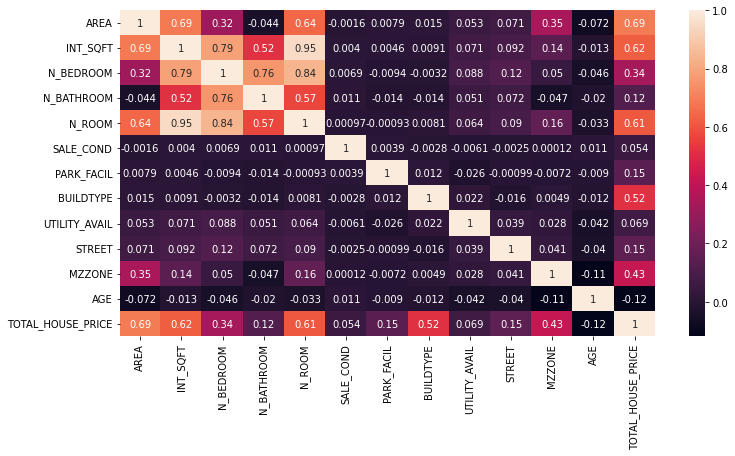

In [1633]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

## SPLITING OF DATA FOR TRAINING

In [1634]:
X = df[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'AGE']].values 
y = df['TOTAL_HOUSE_PRICE'].values

In [1635]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

## DATA SCALING


In [1636]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1637]:
X_train_scaled

array([[-0.28640688, -0.94644848, -0.79330748, ..., -0.09115453,
        -0.20335888, -0.67101876],
       [ 1.34076189,  1.13373272,  0.45263001, ...,  1.16708767,
        -0.20335888, -1.40109025],
       [ 0.7983723 ,  0.58046987,  0.45263001, ...,  1.16708767,
        -0.20335888, -0.67101876],
       ...,
       [-0.82879647, -1.02704189, -0.79330748, ..., -0.09115453,
        -2.20885361, -1.40109025],
       [-0.28640688, -0.92684468, -0.79330748, ...,  1.16708767,
         1.1336376 , -0.18430443],
       [ 0.25598271,  0.9202691 ,  1.69856749, ...,  1.16708767,
        -0.87185712, -0.83325687]])

In [1638]:
r2_value = []
cross_vali = []

## Different Regression Models

## Linear Regression Model

In [1639]:
X=df[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'AGE']].values
y=df['TOTAL_HOUSE_PRICE'].values


In [1640]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [1641]:
from sklearn.preprocessing import StandardScaler # Scaling for linear Regression is not strictly required for better practice we are doing standardscaling
scaler = StandardScaler() #initialise to a variable for standard scaler
scaler.fit(X_train,y_train) #fitting the train datset.we dont fit test dataset as we are going to use the test dataset directly for evalution
X_train_scaled = scaler.transform(X_train) #transform of train data
X_test_scaled = scaler.transform(X_test) 

In [1642]:
r2_value = []
cross_vali = []

In [1643]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [1644]:
y_pred = regressor.predict(X_test_scaled)

In [1645]:
print( 'intercept:', regressor.intercept_)

intercept: 11396857.743274132


In [1646]:
print( 'Coefficient:', regressor.coef_)

Coefficient: [ 1097894.95022648   731648.49700462 -1291519.74470031   123951.08225917
  1797819.02398681   222232.22441504   541302.28682648  1994365.60572293
    63950.25032332   422337.44419314   919520.90547475  -234686.23438345]


## Loss Function and Evalution Metrics for Test Dataset

In [1647]:
from sklearn import metrics

In [1648]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))


Mean Absolute Error: 1078473.0673954766


In [1649]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 1833482542071.5288


In [1650]:
print('R2-Score:',metrics.r2_score(y_test,y_pred))

R2-Score: 0.8831068583944534


In [1651]:
r2_value.append(metrics.r2_score(y_test,y_pred))

In [1652]:
df=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df

,Actual,predicted
0,15869836,1.661708e+07
1,9532023,1.051112e+07
2,13088154,1.302851e+07
3,8867034,8.985536e+06
4,7686720,7.548481e+06
...,...,...
1417,11323045,1.280529e+07
1418,12310929,1.240671e+07
1419,13075938,1.468792e+07
1420,9864834,1.274773e+07


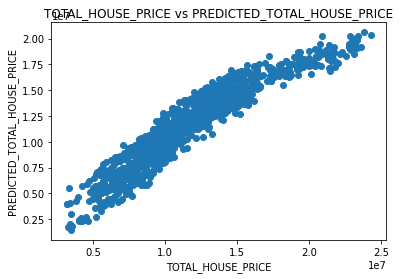

In [1653]:
plt.scatter(y_test,y_pred)
plt.xlabel("TOTAL_HOUSE_PRICE")
plt.ylabel("PREDICTED_TOTAL_HOUSE_PRICE")
plt.title("TOTAL_HOUSE_PRICE vs PREDICTED_TOTAL_HOUSE_PRICE")
plt.show()

## Cross Validation Score

In [1654]:
from sklearn.model_selection import cross_validate
reg=LinearRegression(normalize=True)


In [1655]:
result=cross_validate(reg,X,y,cv=10,scoring="r2")
cross_vali.append(result['test_score'].mean())
result['test_score'].mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(Standar

0.8832373583019896

## Random Forest Regressor Model

In [1656]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [1657]:
y_pred=reg.predict(X_test_scaled)

## Loss Function and Evalution Metrics

In [1658]:
print('R^2:',metrics.r2_score(y_test,y_pred))
r2_value.append(metrics.r2_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))

R^2: 0.9892437221560334
MAE: 324456.97310829815
MSE: 168713470899.2005


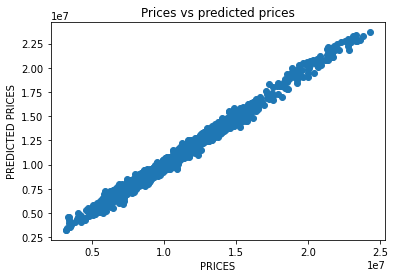

In [1659]:
plt.scatter(y_test,y_pred)
plt.xlabel("PRICES")
plt.ylabel("PREDICTED PRICES")
plt.title("Prices vs predicted prices")
plt.show()

## Cross Validation Score 


In [1660]:
from sklearn.model_selection import cross_validate
reg=RandomForestRegressor()

In [1661]:
result=cross_validate(reg,X,y,cv=10,scoring="r2")
cross_vali.append(result['test_score'].mean())
result['test_score'].mean()

0.9899473708577389

## KNN Regressor Model

In [1662]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [1663]:
y_pred=knn.predict(X_test)

In [1664]:
df3=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df3

,Actual,Predicted
0,15869836,14357936.5
1,9532023,12061299.0
2,13088154,19280191.0
3,8867034,7815862.0
4,7686720,11174639.5
...,...,...
1417,11323045,11084107.5
1418,12310929,10644208.0
1419,13075938,12853297.5
1420,9864834,10488919.5


## LossFunction And Evaluation Metrics

In [1665]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 2421543.6170886075


In [1666]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 9722902693103.965


In [1667]:
print('R^2:',metrics.r2_score(y_test,y_pred))
r2_value.append(metrics.r2_score(y_test,y_pred))

R^2: 0.38011919107893366


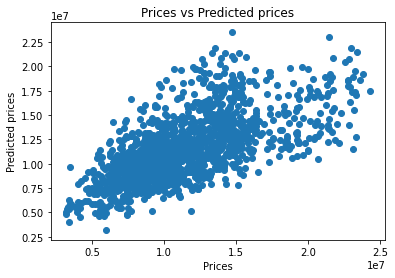

In [1668]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

## Cross Validation Score 

In [1669]:
knn = KNeighborsRegressor(n_neighbors=2)

In [1670]:
cv_results = cross_validate(knn, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.37854510890461457

## Decision Tree Regressor Model

In [1671]:
from sklearn.tree import DecisionTreeRegressor 
deci_regressor = DecisionTreeRegressor(random_state = 0) 
deci_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [1672]:
y_pred = deci_regressor.predict(X_test)

In [1673]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
0,15869836,16255100.0
1,9532023,8996634.0
2,13088154,13250584.0
3,8867034,9217410.0
4,7686720,8037795.0
...,...,...
1417,11323045,11415894.0
1418,12310929,12739542.0
1419,13075938,13037181.0
1420,9864834,9729341.0




```
# This is formatted as code
```

## Loss Function and Evalution Metrics of Desicion Tree

In [1674]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
r2_value.append(metrics.r2_score(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 526606.4563994374
Mean Squared Error: 452505003410.9177
R2- SCORE: 0.9711506762528709


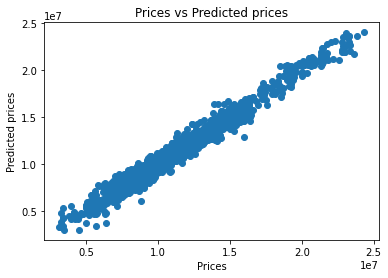

In [1675]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

## Cross Validation Score Desicion Tree

In [1676]:
detree = DecisionTreeRegressor(random_state = 0) 

In [1677]:
cv_results = cross_validate(detree, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.9760253478197332

#Support Vectore Machine

In [1678]:
from sklearn.svm import SVR
svm_regressor = SVR() 
svm_regressor.fit(X_train_scaled,y_train)

SVR()

In [1679]:
y_pred = svm_regressor.predict(X_test_scaled)

In [1680]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
0,15869836,1.079240e+07
1,9532023,1.079207e+07
2,13088154,1.079231e+07
3,8867034,1.079175e+07
4,7686720,1.079193e+07
...,...,...
1417,11323045,1.079232e+07
1418,12310929,1.079226e+07
1419,13075938,1.079223e+07
1420,9864834,1.079220e+07


# Loss Function and Evalution Metrics of SVM

In [1681]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
r2_value.append(metrics.r2_score(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 3089868.8582446766
Mean Squared Error: 16152384558388.037
R2- SCORE: -0.02979053911124585


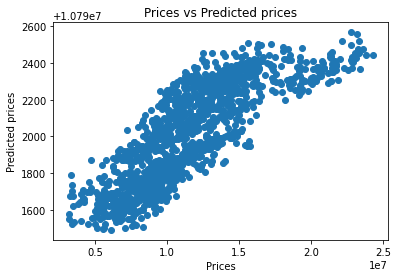

In [1682]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

 ##Cross Validation Score SVM

In [1683]:
from sklearn.model_selection import cross_validate
svm=SVR()

In [1684]:
cv_results = cross_validate(svm, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

-0.023377525610611193

### Comparing R^2 Value and Crossing Validation Score

In [1685]:
result = {'R2 Score' : r2_value,'Cross Validation Mean Score':cross_vali}
ind = ['Linear Regression','Random Forest','KNN','Decision Tree','Support Vector Machine']
df_result = pd.DataFrame(result, index=ind)
df_result

,R2 Score,Cross Validation Mean Score
Linear Regression,0.883107,0.883237
Random Forest,0.989244,0.989947
KNN,0.380119,0.378545
Decision Tree,0.971151,0.976025
Support Vector Machine,-0.029791,-0.023378


Random Forest shows better result than other algorithm

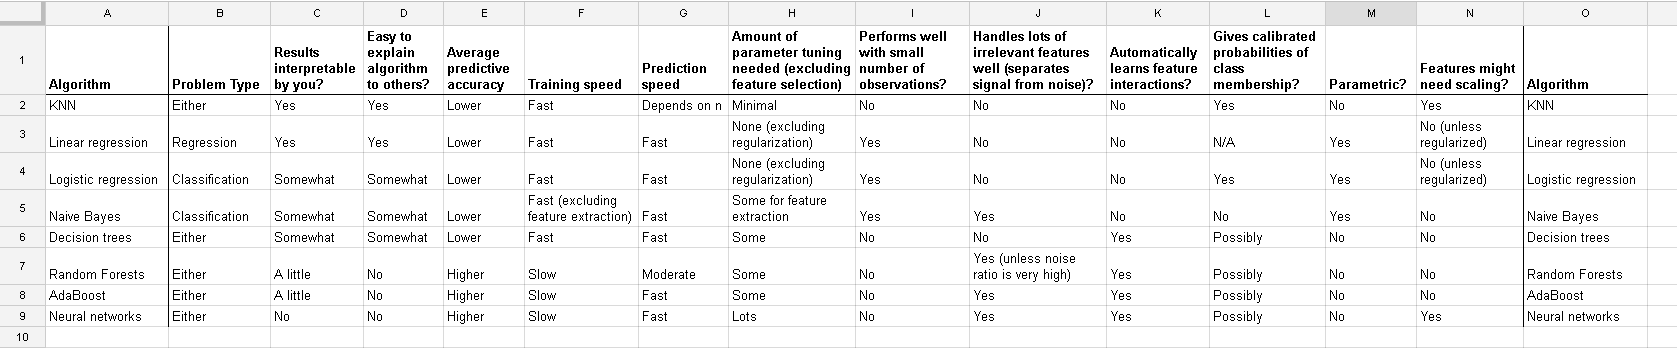